# 퍼셉트론(Perceptron)

퍼셉트론은 엄밀히 말하자면 딥러닝은 아니지만 뉴런과 상당히 닮은 분류기이다.

뉴런의 계산 과정을 이해하고 뉴런 하나만으로도 AND, OR 연산과 같은 기초적인 연산을 할 수 있음을 알아본다.

+ AND
+ OR

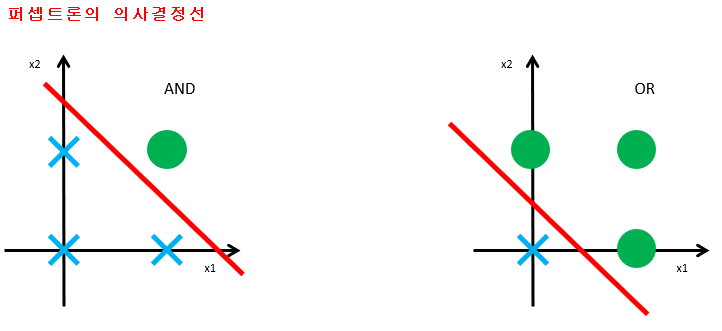

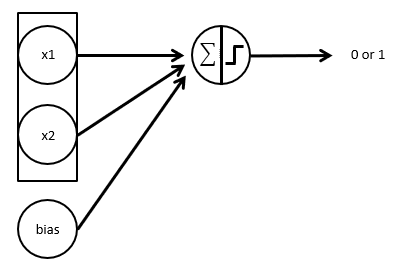

## 0.환경설정

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


## 1. 기본 설정

퍼셉트론 코드의 이해도를 높이기 위해 1은 True 0은 False 그리고 편향값(bias)은 1로 지정한다.

In [2]:
T = 1.0
F = 0.0
bias = 1.0

다음과 같이 AND, OR, XOR 실습 데이터를 함수 형태로 정의하고 함수를 호출하여 데이터를 획득할 수 있게 한다.

In [3]:
def get_AND_data():
    # 학습 데이터
    X = [[F, F, bias],
         [F, T, bias],
         [T, F, bias],
         [T, T, bias]]
    
    # 레이블, 클래스, 실제값
    Y = [[F],[F],[F],[T]]
    
    return X, Y

def get_OR_data():
    X = [[F, F, bias],
         [F, T, bias],
         [T, F, bias],
         [T, T, bias]]
    Y = [[F],[T],[T],[T]]
    return X, Y

def get_XOR_data():
    X = [[F, F, bias],
         [F, T, bias],
         [T, F, bias],
         [T, T, bias]]
    Y = [[F],[T],[T],[F]]
    return X, Y

## 2. AND 퍼셉트론 구현

### 2.1. 데이터 호출

AND 연산에 필요한 데이터를 호출한다.

In [4]:
X, Y = get_AND_data()
X, Y

([[0.0, 0.0, 1.0], [0.0, 1.0, 1.0], [1.0, 0.0, 1.0], [1.0, 1.0, 1.0]],
 [[0.0], [0.0], [0.0], [1.0]])

### 2.2. 가중치 설정

논리 연산을 위한 입력값으로 X, Y, bias을 입력받아(총 3개의 입력) 1개의 값을 출력해야 하므로 가중치(weights) [3,1]로 설정한다.

In [5]:
W = tf.Variable(tf.random_normal([3, 1]))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run(W))

[[ 0.91372544]
 [-0.01827784]
 [ 1.7267065 ]]


### 2.3. 스텝함수 구현

x가 0보다 크면 1, x가 0보다 작거나 같을 때는 0을 리턴하는 활성화 함수(스텝 함수)를 구현한다.

+ 퍼셉트론은 두 개의 입력이 있을 때 하나의 뉴런으로 두 개의 입력을 계산한 뒤 최종 결과값으로 0 또는 1을 출력한다.

+ 두 개의 입력은 가중치와 곱해져서 뉴런의 첫 번째 단계인 시그마로 들어가고 시그마 단계에서는 모든 가중치 * 입력값과 편향값(bias)을 더하는 과정이 이루어진다.

+ 시그마 값은 뉴런의 두 번째 단계인 활성화 함수의 입력으로 들어가는데 퍼셉트론은 스텝 함수하는 활성화 함수를 사용한다. 스템함수는 스그마 > 0 일 경우 1, 스그마 <= 0 일 경우 0

In [6]:
# tf.greater(a, b): a > b일 경우 True, 그렇치 않으면 False를 리턴한다.
# tf.greater_equal(a, b): a >= b일 경우 True, 그렇치 않으면 False를 리턴한다.
# tf.less(a, b): a < b일 경우 True, 그렇치 않으면 False를 리턴한다.
# tf.less_equal(a, b): a <= b일 경우 True, 그렇치 않으면 False를 리턴한다.
# tf.equal(a, b): a == b일 경우 True, 그렇치 않으면 False를 리턴한다.

sess = tf.Session()

# f = tf.greater(1,0)
# f = tf.to_float(tf.greater(1,0))
f = tf.cast(tf.greater(1,0), tf.float32)
print(sess.run(f))

1.0


In [7]:
def step(x):
    return tf.cast(tf.greater(x,0), tf.float32)

### 2.4. 손실(오차)  함수로 평균 제곱근 오차(MSE)를 사용한다.

In [8]:
# matmul : 행렬 곱셈 메소드로 데이터와 가중치를 곱한다.
f = tf.matmul(X,W)

# 스텝 함수 실행 -> 예측값
output = step(f)

# 레이블(실제) 값과 스템 함수 실행 결과의 편차를 계산한다.
error = tf.subtract(Y, output)

# 평균 제곱 오차를 게산한다.
mse = tf.reduce_mean(tf.square(error))

### 2.5. 매개 변수 최적화

보통의 경우 딥러닝 모델은 경사 하강법을 통해 매개 변수를 최적화하지만 미분값이 큰 의미가 없는 스템 함수의 영향으로(입력값이 0일때 미분 불가능, 입력값이 0이 아닐때 미분값은 항상 0) 퍼셉트론은 아래와 같은 방법으로 최적화를 진행한다.

+ 결과값이 1이 나와야 하는데 스템 함수의 출력값일 0일 경우 -> w_new = w_old + delta

+ 결과값이 0이 나와야 하는데 스템 함수의 출력값일 1일 경우 -> w_new = w_old - delta

위의 2가지 경우를 다음과 같이 사용할 수 있다.

In [9]:
# 행렬의 transpose 는 행과 열을 교환하여 얻는 전치 행렬을 의미한다.
# matmul() 메소드의 transpose_a=True 옵션을 사용하면 곱하기 전에 1번째 인수인 행렬을 전치하고 
# transpose_b=True 옵션을 사용하면 2번째 인수인 행렬을 전치해서 행렬을 곱한다.
delta = tf.matmul(X, error, transpose_a=True)

# assign() 메소드는 세션 안에서 텐서플로우 변수 값을 변경한다.
train = tf.assign(W, tf.add(W, delta))



### 2.6. 테스트 진행

In [10]:
# 텐서플로우 세션을 만든다
with tf.Session() as sess:
    # 텐서플로우 변수를 초기화 한다
    sess.run(tf.global_variables_initializer())
    err = 1
    epoch, max_epochs = 0, 20
    
    # 에러가 발생하지 않고 
    # 학습 횟수가 학습 횟수의 최대값을 넘어가지 않는 동안 반복한다.
    while err > 0.0 and epoch < max_epochs:
        epoch += 1
        err = sess.run(mse) # 평균 제곱 오차를 계산한다.
        sess.run(train)     # 학습 시킨다.
        print('epoch : {0:2d}, 평균제곱오차(MSE): {1:4.2f}'.format(epoch, err))
        
    # 평균제곱오차가 0이 되는 순간 스텝 함수의 실행 결과를 출력한다.
    print('테스트 결과 : ')
    print(sess.run(output))

epoch :  1, 평균제곱오차(MSE): 0.50
epoch :  2, 평균제곱오차(MSE): 0.75
epoch :  3, 평균제곱오차(MSE): 0.25
epoch :  4, 평균제곱오차(MSE): 0.75
epoch :  5, 평균제곱오차(MSE): 0.25
epoch :  6, 평균제곱오차(MSE): 0.00
테스트 결과 : 
[[0.]
 [0.]
 [0.]
 [1.]]


# ✨정리 코드

In [19]:
# 데이터 호출
# X, Y = get_AND_data()
X, Y = get_OR_data()
# X, Y = get_XOR_data() -> 결과값이 제대로 안 나옴

# 가중치 설정
W = tf.Variable(tf.random_normal([3, 1]))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 스텝 함수 구현
def step(x):
    return tf.cast(tf.greater(x,0), tf.float32)

# 손실 함수로 평균제곱오차 사용
f = tf.matmul(X,W)
output = step(f)
error = tf.subtract(Y, output)
mse = tf.reduce_mean(tf.square(error))

# 매개변수 최적화
delta = tf.matmul(X, error, transpose_a=True)
train = tf.assign(W, tf.add(W, delta))

# 테스트 진행
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    err = 1
    epoch, max_epochs = 0, 20
    
    while err > 0.0 and epoch < max_epochs:
        epoch += 1
        err = sess.run(mse)
        sess.run(train)
        print('epoch : {0:2d}, 평균제곱오차(MSE): {1:4.2f}'.format(epoch, err))
        
    print('테스트 결과 : ')
    print(sess.run(output))
    

epoch :  1, 평균제곱오차(MSE): 0.75
epoch :  2, 평균제곱오차(MSE): 0.25
epoch :  3, 평균제곱오차(MSE): 0.25
epoch :  4, 평균제곱오차(MSE): 0.25
epoch :  5, 평균제곱오차(MSE): 0.25
epoch :  6, 평균제곱오차(MSE): 0.25
epoch :  7, 평균제곱오차(MSE): 0.00
테스트 결과 : 
[[0.]
 [1.]
 [1.]
 [1.]]


> 퍼셉트론은 AND, OR 연산과 같이 선형 분리되는 분류는 가능하지만 XOR와 같이 선형 분리가 되지 않는 분류는 불가능하다.